# Task - Diabeties Prediction

#### The given dataset contains **medical** and **demographic data** of 768 individuals, including **features** such as Glucose level, Blood Pressure, BMI, Insulin levels, Age, and Pregnancy count. The **Outcome column (0 or 1)** indicates whether a person has diabetes.

The goal of analyzing this dataset is to develop a predictive model for diabetes diagnosis based on medical attributes. This can involve:

1.   **Exploratory Data Analysis (EDA)** to identify key risk factors.
2.   **Feature Engineering** & Selection to improve model performance.

1.   **Machine Learning Classification** to predict diabetes risk.
2.   **Statistical Insights** on how different features correlate with diabetes.





## Task 1: Importing and inspecting the data

In [1]:
# Mount the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [3]:
# Load the dataset from drive

data = pd.read_csv('/content/drive/MyDrive/6. Machine Learning/Assignment - Logistic Regression/diabetes.csv')

In [4]:
# Load the dataset

#data = pd.read_csv('diabetes.csv')

In [5]:
# Check the data

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


*   **Features** - **Continous** variable
*   **Target** - **Discrete** / Non-continous


In [6]:
# Check for the total no of Rows and Columns

data.shape

(768, 9)

In [7]:
# Check for summary

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Check for Null values

data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
# List all the columns

data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
# Check the value count of Target variable

data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [11]:
# Check for Duplicate records

data.duplicated().sum()

np.int64(0)

In [12]:
# Check for Statistical summary

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Task 2 - Exploratory Data Analysis

**1. Check the distribution of the target variable.**

**2. Check the distribution of the important numerical features.**

**3. Check the correlation between the numerical features and the target variable.**


In [13]:
# Check the Distribution of Target column

data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


### Exploratory Data Analysis

### Univariate Analysis

**PIE-CHART**

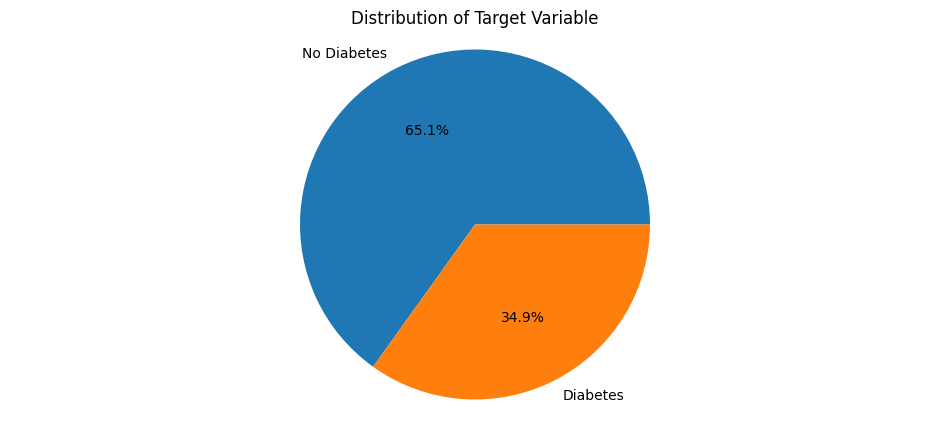

In [14]:
# Plot the pie-chart for Target column

v = data['Outcome'].value_counts().values

plt.figure(figsize=(12, 5))
plt.pie(v, labels = ['No Diabetes', 'Diabetes'], autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Target Variable')
plt.show()

**Inference**
1.   **Prevalence of Diabetes:** The pie chart shows that a larger portion of the dataset consists of individuals without diabetes ('No Diabetes')
  *   This suggests that the prevalence of diabetes in the population represented by this dataset is lower compared to the proportion of individuals without diabetes
2.   **Class Imbalance:** The significant difference in the sizes of the two slices indicates a potential class imbalance in the dataset.
  *   This means that there are considerably more instances of one class (no diabetes) compared to the other (diabetes).


**HISTOGRAM**

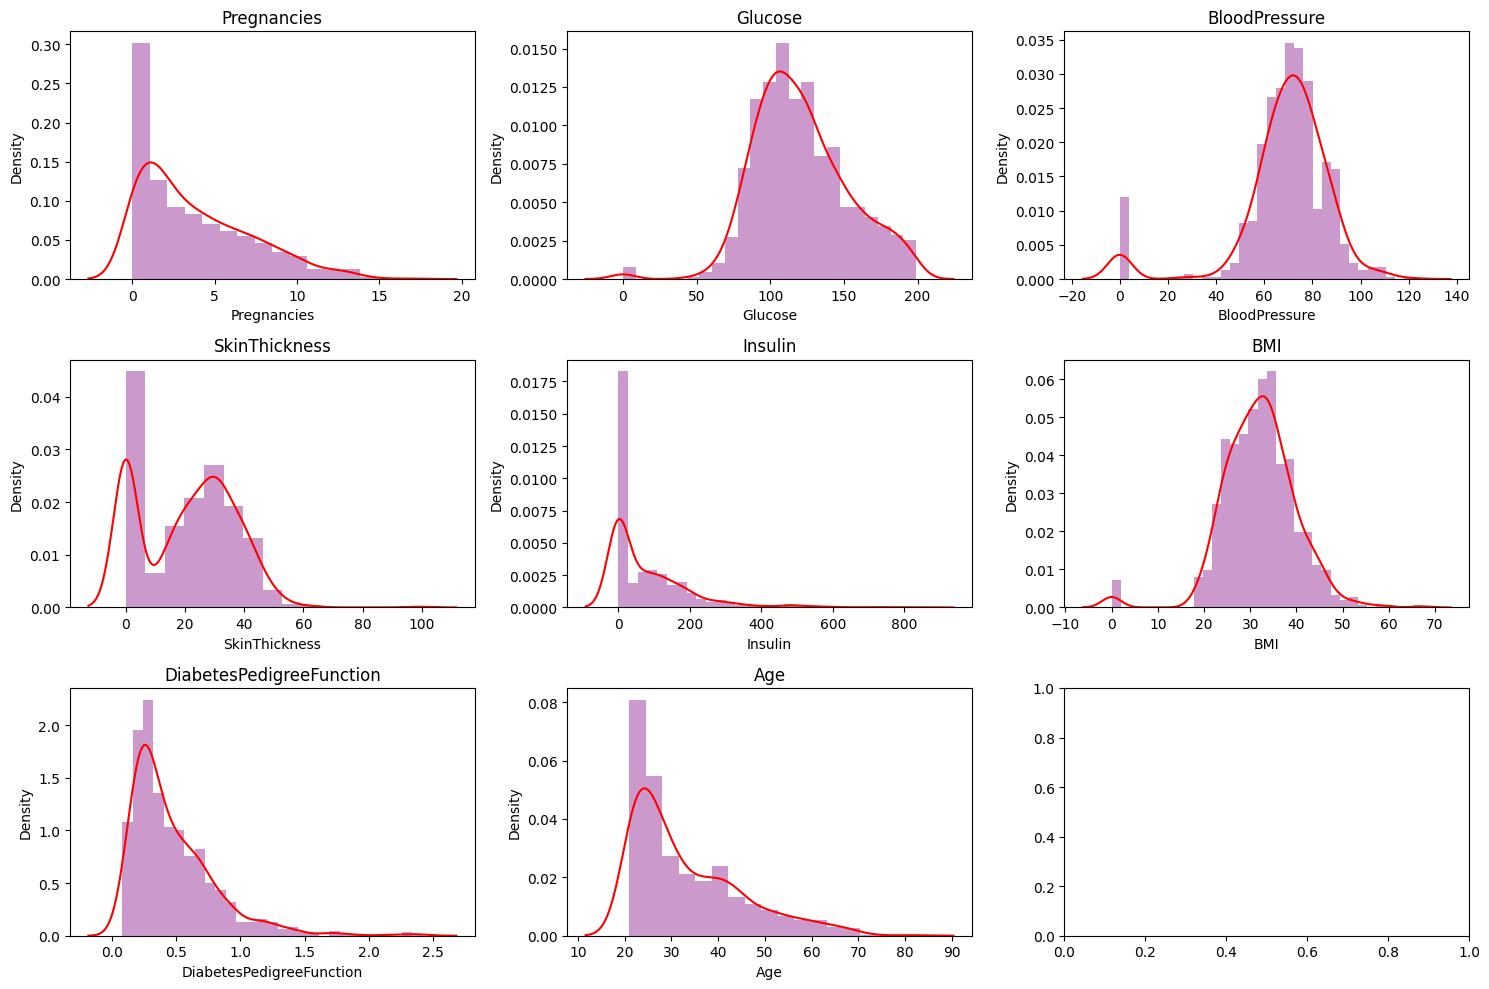

In [15]:
# Plot the Distribution graph of all column with subplots

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, col in enumerate(data.columns[:-1]):
    sns.distplot(data[col], ax=ax[i // 3, i % 3],
                 hist_kws={'color': 'purple'},  # Color of histogram bars
                 kde_kws={'color': 'red'})  # Color of the KDE line
    ax[i // 3, i % 3].set_title(col)

plt.tight_layout()
plt.show()

The histogram provides insights into the overall shape of the distribution like:

1.   **Skewness:** Whether the distribution is symmetrical or skewed to one side.
2.   **Modality:** The number of prominent peaks in the distribution.

1.   **Outliers:** Data points that lie far from the majority of the data.
2.   **Kernel Density Estimation (KDE) Curve**: to visualize the underlying pattern of the distribution and identify areas of higher and lower density








**Summary** -

*   **Normally Distributed Features:** Features with a bell-shaped distribution indicate a normal or Gaussian distribution. (eg - Glucose, BP, BMI )
*   **Skewed Distributions:** Features with skewed distributions may require transformations to improve model performance. ( eg - Pregnancies, Age, Diabetes Pedigree Function, Insulin)

*   **Outliers:** Some of them possess outliers which needs to be removed (eg - Insulin, Skin thickness)
*   **Missing Values:** A lot of them have 0 values in graph, but in actual they can never be 0. This indicates Missing values. (eg - Glucose, BP, BMI, Skin thickness, Insulin)





#### Check for Multi-Collinearity

In [16]:
# Check for Coorelation between Feature and Target variable

cor = data.corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**HEATMAP**

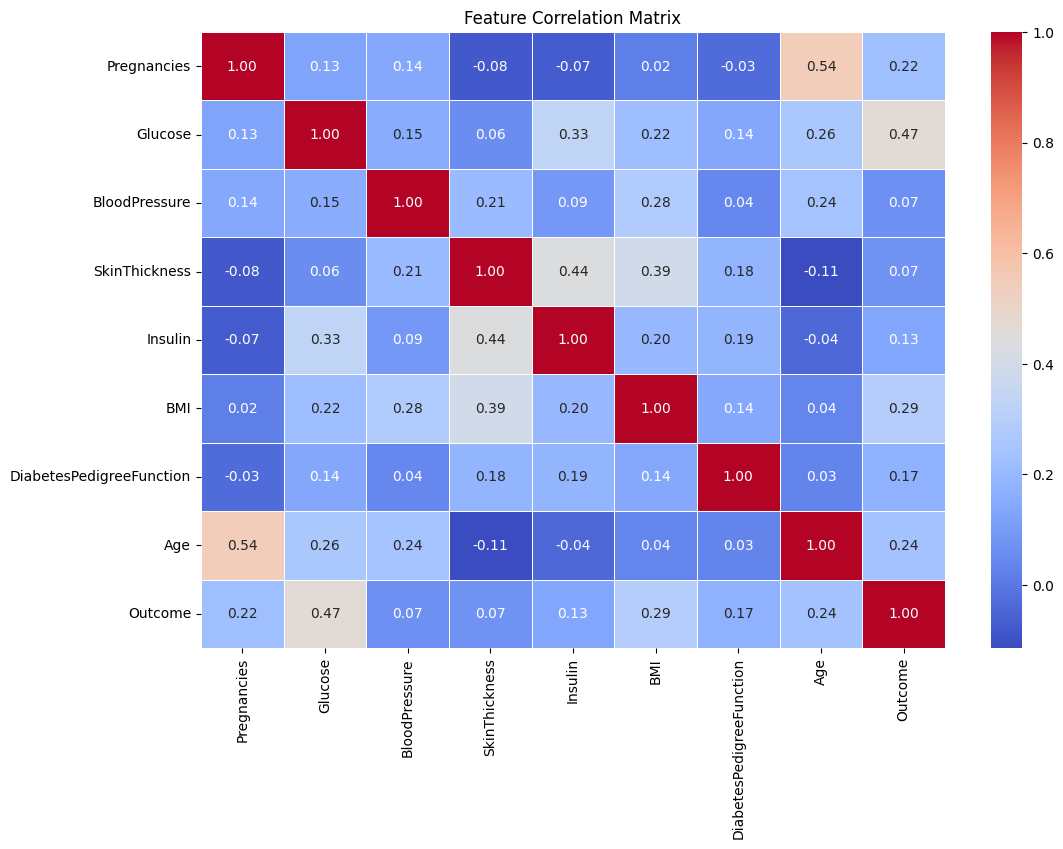

In [17]:
# Plot the Heat Map to visualize the correlation

plt.figure(figsize=(12, 8))
sns.heatmap(cor, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

**HEAT MAP** to visualize the correlation matrix stored in the cor variable

*   **Dark Red**: Indicates a strong **positive correlation**.
*   **Dark Blue**: Indicates a strong **negative correlation**.
*   **Light Colors/White**: Indicates a **weak or no correlation**

**Positive Correlation:**

1.   **Glucose** and **Insulin**: strong positive correlation indicating that higher glucose levels are often associated with higher insulin levels.
2.   **Glucose** and **Outcome**: higher glucose levels are associated with a higher likelihood of diabetes

1.   **BMI** and **SkinThickness**: individuals with higher BMI tend to have thicker skin folds.
2.   **Age** and **Pregnancies**: older individuals might have had more pregnancies.

1.   **BMI** and **Outcome**: higher BMI values are linked to a higher probability of diabetes.
2.   **Age** and **Glucose**: a slight increase in glucose levels with age


**Negative Correlation:**

1.   **BloodPressure** and **Age**: BP might slightly decrease with age

2.   **SkinThickness** and **Age**: skin thickness might slightly decrease with age


## Task 3: Feature Engineering

***Q.Replace all the zeroes in the numerical columns with the median of the column.***

#### Replace missing values with Median



In [18]:
# Replace missing values with mean

data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].median())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].median())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].median())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].median())
data['BMI'] = data['BMI'].replace(0, data['BMI'].median())


**BOX PLOT**

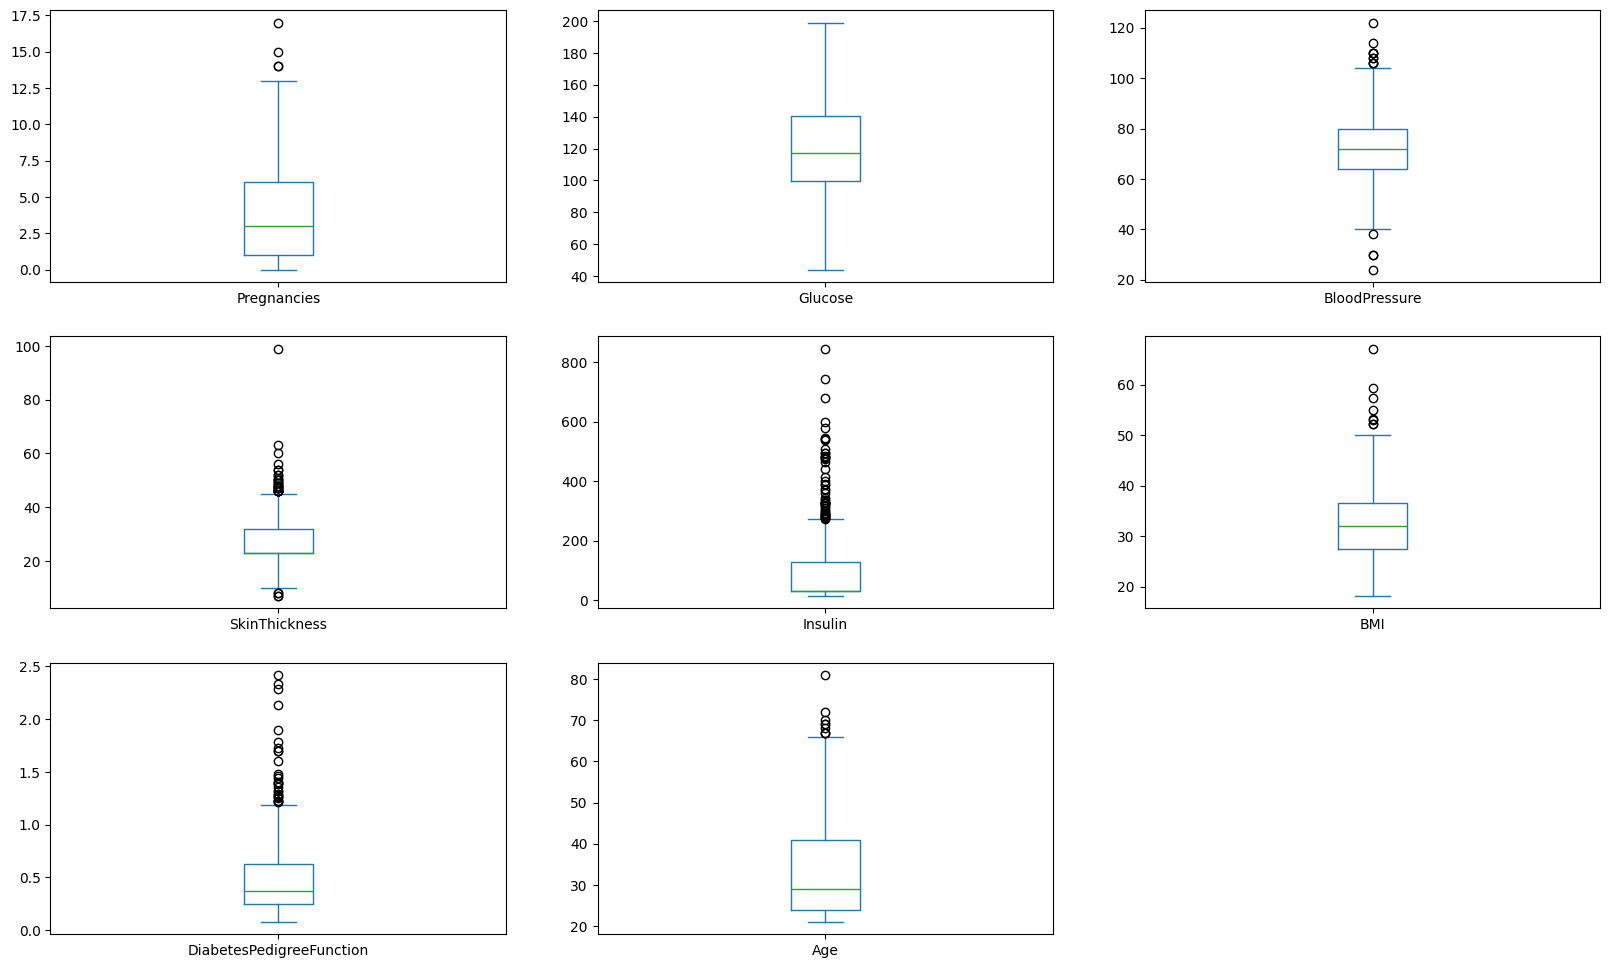

In [19]:
# Plot BOXPLOT with subplots to check outliers except Target column

fig, axes = plt.subplots(figsize=(20, 12))
data.drop('Outcome', axis=1).plot(kind = 'box', subplots = True, ax=axes, layout = (3, 3))
plt.show()

**Inference**

1.   **Insulin, SkinThickness, DiabetesPedigreeFunction, Age, BMI and BloodPressure** appear to have the **most outliers**, indicating potential extreme values or data entry errors that might require attention during preprocessing.
2.   **Pregnancies and Glucose** seem to have relatively **fewer outliers**, suggesting a more typical distribution for these features



In [20]:
# Function for putting a cap value on each of the selected column to REMOVE the Outliers

def cap_outliers(data, col_name):

  for i in col_name:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    print(f"Column: {i}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")

    data[i] = np.where(data[i] < lower_bound, lower_bound, data[i])
    data[i] = np.where(data[i] > upper_bound, upper_bound, data[i])

  return data

In [21]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [22]:
# Setting the cap value as defined in the Function

data = cap_outliers(data, col_name=['Pregnancies'])
data = cap_outliers(data, col_name=['SkinThickness'])
data = cap_outliers(data, col_name=['Insulin'])
data = cap_outliers(data, col_name=['DiabetesPedigreeFunction'])
data = cap_outliers(data, col_name=['Age'])
data = cap_outliers(data, col_name=['BMI'])
data = cap_outliers(data, col_name=['BloodPressure'])

Column: Pregnancies
Lower Bound: -6.5
Upper Bound: 13.5
Column: SkinThickness
Lower Bound: 9.5
Upper Bound: 45.5
Column: Insulin
Lower Bound: -114.625
Upper Bound: 272.375
Column: DiabetesPedigreeFunction
Lower Bound: -0.32999999999999996
Upper Bound: 1.2
Column: Age
Lower Bound: -1.5
Upper Bound: 66.5
Column: BMI
Lower Bound: 13.849999999999998
Upper Bound: 50.25
Column: BloodPressure
Lower Bound: 40.0
Upper Bound: 104.0


Re-check after Removal of Outliers

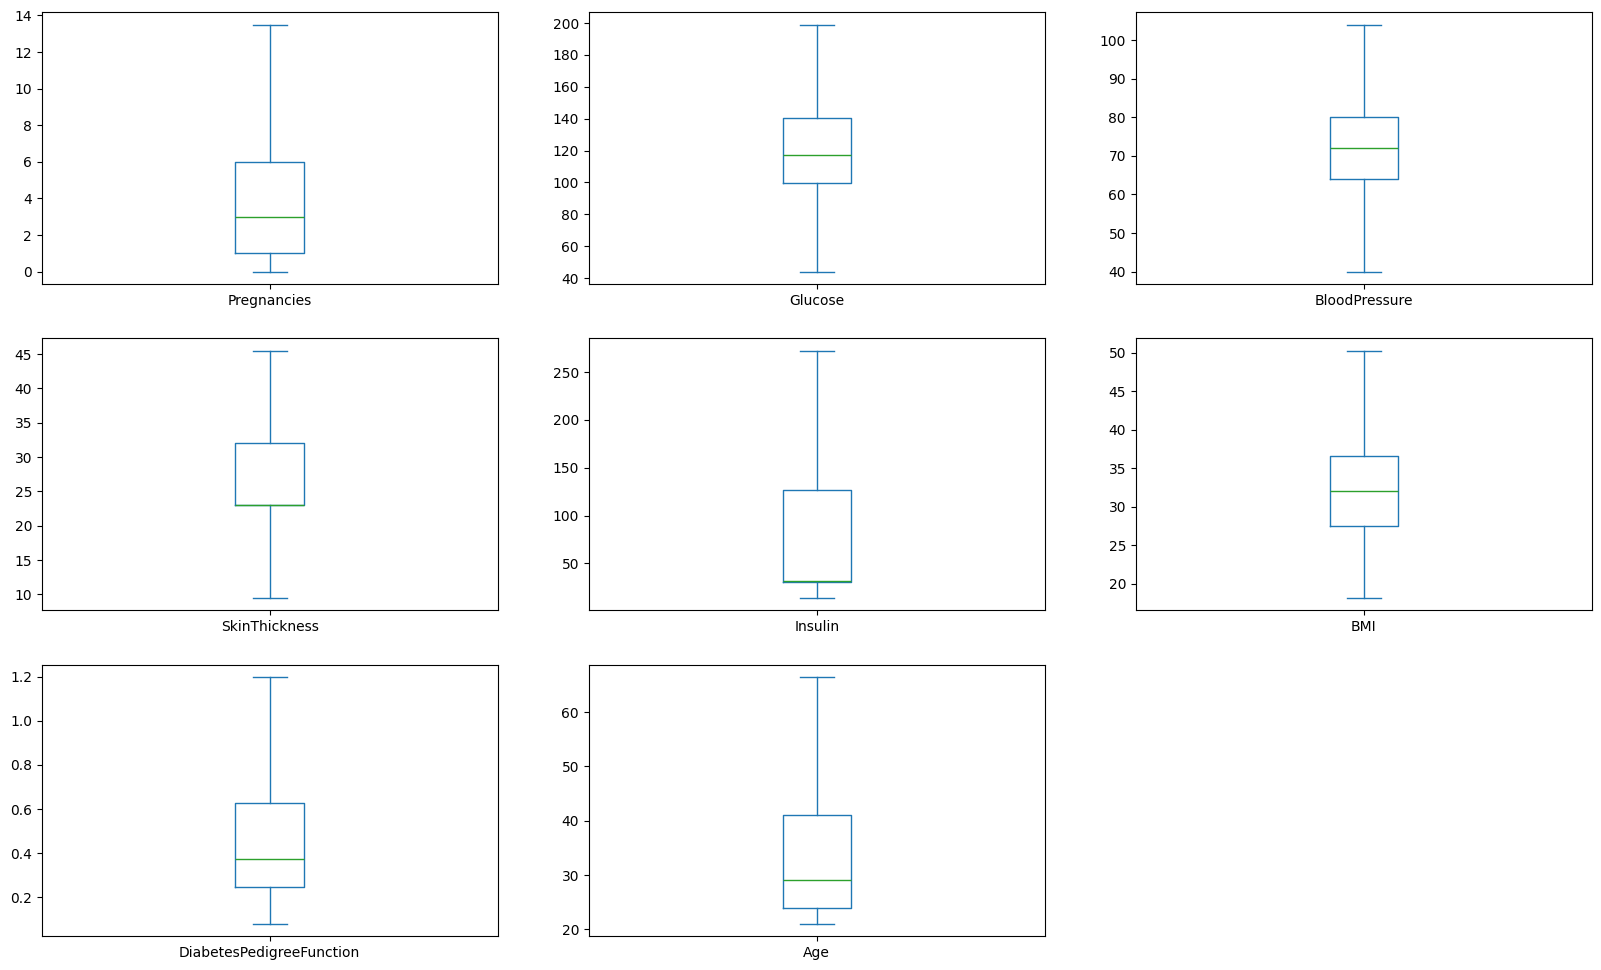

In [23]:
# Plot BOXPLOT with subplots to check outliers except Target column

fig, axes = plt.subplots(figsize=(20, 12))
data.drop('Outcome', axis=1).plot(kind = 'box', subplots = True, ax=axes, layout = (3, 3))
plt.show()

All the outliers have been removed and capping is done with Upper bound and Lower bound values

Proceeding **without NORMALIZATION / STANDARDIZATION**

## Task 4: Data Splitting

#### Splitting the dataset

In [24]:
# Splitting the dataset into Features and Target variable (Price)

X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [25]:
# Splitting the dataset into Train and Test for both Features and Target variable in 70:30

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=335)

In [26]:
# Check the shape of Train and Test data for both Features and Target variable

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))



*   **Features variable** dataset (X) - splitted into 80% (X Train) + 20% (X Test)

*   **Target variable** dataset (y) - splitted into 80% (y Train) + 20% (y Test)



## Task 5: Algorithm Selection & Training
***1. Logistic Regression***

***2. Naive Bayes***

### 1. Applying Logistic Regression Model

In [27]:
# Import Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

Proceeding **without RFE**

In [28]:
# Fitting the dataset to Linear Regression Model after feature elimination through RFE

lr.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Finding the weightage of each feature (Input + Target variable)

lr.coef_

array([[ 0.12604612,  0.03409386, -0.02086409,  0.01259753, -0.00308181,
         0.08570858,  2.00728761,  0.00629168]])

In [30]:
# Check the prediction when all the input features are set to 0 (Hypothetical)

lr.intercept_

array([-7.8978832])

### Making Prediction on Training data for Logistic Regression

In [31]:
# Making Prediction on (80%)training data of Input variable/ Features

X_train_pred_log = lr.predict(X_train)

### Making Prediction on Testing data for Logistic Regression

In [32]:
# Making Prediction on (20%)testing data of Input variable/ Features

X_test_pred_log = lr.predict(X_test)

## Task 6: Model Evaluation for Logistic Regression

**ACCURACY score**

In [33]:
# Finding the Accuracy score

from sklearn.metrics import accuracy_score

print("Accuracy Score for Logistic Regression on Training data: ", round(accuracy_score(y_train, X_train_pred_log)*100,2), "%")


Accuracy Score for Logistic Regression on Training data:  77.52 %


In [34]:
# Converting Accuracy score in %

print("Accuracy Score for Logistic Regression on Testing data: ", round(accuracy_score(y_test, X_test_pred_log)*100,2), "%")


Accuracy Score for Logistic Regression on Testing data:  78.57 %


**LOGISTIC REGRESSION -**


  *   **Accuracy Score = 77.52 %** on Training Data and **Accuracy Score = 78.57 %** on Test Data

### CONFUSION Matrix for Logistic Regression

In [35]:
# Import the confusion_matrix function
from sklearn.metrics import confusion_matrix
cm_log = confusion_matrix(y_test, X_test_pred_log)
cm_log

array([[86, 13],
       [20, 35]])

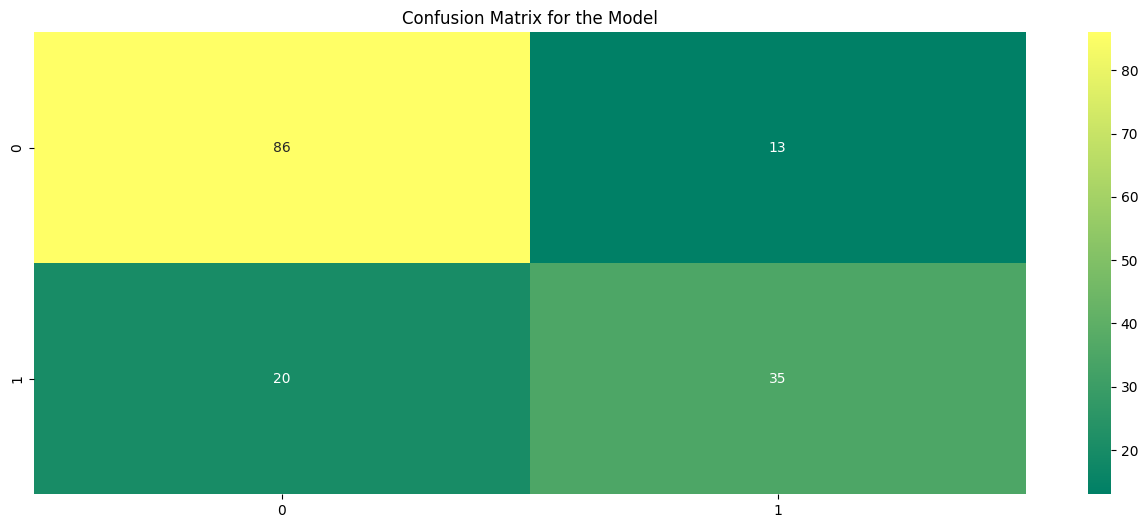

True Negatives: 86
False Positives: 13
False Negatives: 20
True Positives: 35


In [36]:
# Plot the Confusion Matrix

cm_log = confusion_matrix(y_test, X_test_pred_log)

plt.figure(figsize = (16, 6))
plt.title("Confusion Matrix for the Model")
sns.heatmap(cm_log, annot = True, cmap = 'summer')

plt.show()

TN = cm_log[0, 0]
FP = cm_log[0, 1]
FN = cm_log[1, 0]
TP = cm_log[1, 1]

print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

**Inference**

1.   **True Negative (TN)**: The **top-left (86)** quadrant shows the number of instances that were **correctly predicted** as not having diabetes (0).
2.   **False Positive (FP):** The **top-right (13)** quadrant shows the number of instances that were **incorrectly predicted** as having diabetes (1) when they actually did not (0). (Type I error)

1.   **False Negative (FN):** The **bottom-left (20)** quadrant shows the number of instances that were **incorrectly predicted** as not having diabetes (0) when they actually did (1). (Type II error)
2.   **True Positive (TP):** The **bottom-right (35)** quadrant shows the number of instances that were **correctly predicted** as having diabetes (1)


## Evaluation Score for Logistic Regression

In [37]:
# Check Precision, F1-score and Recall score for train data

from sklearn.metrics import precision_score, f1_score, recall_score

print("Precision Score : ", precision_score(y_train, X_train_pred_log))
print("F1 Score : ", f1_score(y_train, X_train_pred_log))
print("Recall Score : ", recall_score(y_train, X_train_pred_log))

Precision Score :  0.7300613496932515
F1 Score :  0.6329787234042553
Recall Score :  0.5586854460093896


Score for **Training data** without Normalization / Standardization

*   Precision Score :  0.73
*   F1 Score :  0.63
*   Recall Score :  0.55


In [38]:
# Check Precision, F1-score and Recall score for test data

print("Precision Score : ", precision_score(y_test, X_test_pred_log))
print("F1 Score : ", f1_score(y_test, X_test_pred_log))
print("Recall Score : ", recall_score(y_test, X_test_pred_log))


Precision Score :  0.7291666666666666
F1 Score :  0.6796116504854369
Recall Score :  0.6363636363636364


Score for **Testing data** without Normalization / Standardization

*   Precision Score :  0.73
*   F1 Score :  0.68
*   Recall Score :  0.64

### **Classification Report** for Logistic Regression

In [39]:
# Print Classification Report of Training data

from sklearn.metrics import classification_report # Import classification_report

print("Classification Report for Training Data :")
print(classification_report(y_train, X_train_pred_log))

Classification Report for Training Data :
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       401
           1       0.73      0.56      0.63       213

    accuracy                           0.78       614
   macro avg       0.76      0.72      0.74       614
weighted avg       0.77      0.78      0.77       614



In [40]:
# Print Classification Report of Testing data

from sklearn.metrics import classification_report # Import classification_report

print("Classification Report for Training Data :")
print(classification_report(y_test, X_test_pred_log))

Classification Report for Training Data :
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        99
           1       0.73      0.64      0.68        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



### **2. Naive Bayes Classifier**

In [41]:
# Importing GaussianNB class

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [42]:
# Training the Naive Bayes Classifier model on (Training data) Features and  (Testing data) Target variable

clf.fit(X_train, y_train)

GaussianNB()

### Making Prediction on Training data for Naive Bayes

In [43]:
# Making Prediction on train data by trained Naive Bayes classifier

X_train_pred_nb = clf.predict(X_train)

### Making Prediction on Testing data for Naive Bayes

In [44]:
# Making Prediction on test data by trained Naive Bayes classifier

X_test_pred_nb = clf.predict(X_test)

## Model Evaluation for Naive Bayes

In [45]:
# Finding the Accuracy score

print("Accuracy Score for Naive Bayes on Training data: ", round(accuracy_score(y_train, X_train_pred_nb)*100,2), "%")

Accuracy Score for Naive Bayes on Training data:  75.41 %


In [46]:
# Finding the Accuracy score

print("Accuracy Score for Naive Bayes on Testing data: ", round(accuracy_score(y_test, X_test_pred_nb)*100,2), "%")

Accuracy Score for Naive Bayes on Testing data:  75.97 %


**NAIVE BAYES -**


  *   **Accuracy Score = 75.41 %** on Training Data and **Accuracy Score = 76 %** on Test Data which is **less than Logistic Regression**

### CONFUSION Matrix for Naive Bayes

In [47]:
# Import the confusion_matrix function
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, X_test_pred_nb)
cm_nb

array([[85, 14],
       [23, 32]])

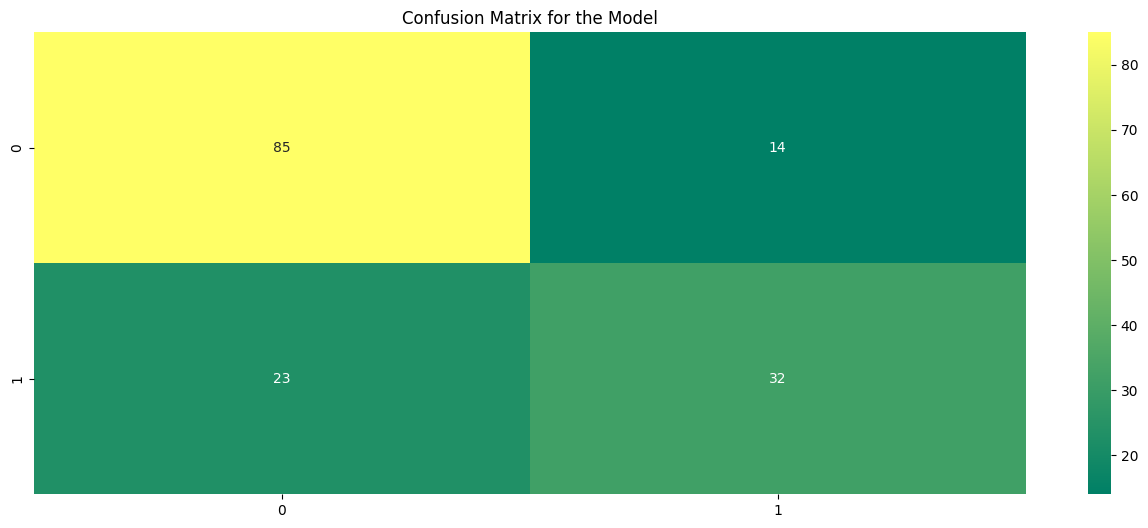

True Negatives: 85
False Positives: 14
False Negatives: 23
True Positives: 32


In [48]:
# Plot the Confusion Matrix

cm_nb = confusion_matrix(y_test, X_test_pred_nb)

plt.figure(figsize = (16, 6))
plt.title("Confusion Matrix for the Model")
sns.heatmap(cm_nb, annot = True, cmap = 'summer')

plt.show()

TN = cm_nb[0, 0]
FP = cm_nb[0, 1]
FN = cm_nb[1, 0]
TP = cm_nb[1, 1]

print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

**Inference**

1.   **True Negative (TN)**: The **top-left (85)** quadrant shows the number of instances that were **correctly predicted** as not having diabetes (0).
2.   **False Positive (FP):** The **top-right (14)** quadrant shows the number of instances that were **incorrectly predicted** as having diabetes (1) when they actually did not (0). (Type I error)

1.   **False Negative (FN):** The **bottom-left (23)** quadrant shows the number of instances that were **incorrectly predicted** as not having diabetes (0) when they actually did (1). (Type II error)
2.   **True Positive (TP):** The **bottom-right (32)** quadrant shows the number of instances that were **correctly predicted** as having diabetes (1)





## Evaluation Score for Naive Bayes

In [49]:
# Check Precision, F1-score and Recall score for train data

print("Precision Score : ", precision_score(y_train, X_train_pred_nb))
print("F1 Score : ", f1_score(y_train, X_train_pred_nb))
print("Recall Score : ", recall_score(y_train, X_train_pred_nb))

Precision Score :  0.6504854368932039
F1 Score :  0.639618138424821
Recall Score :  0.6291079812206573


Score for **Training data** without Normalization / Standardization

*   Precision Score :  0.65
*   F1 Score :  0.64
*   Recall Score :  0.63


In [50]:
# Check Precision, F1-score and Recall score for test data

print("Precision Score : ", precision_score(y_test, X_test_pred_nb))
print("F1 Score : ", f1_score(y_test, X_test_pred_nb))
print("Recall Score : ", recall_score(y_test, X_test_pred_nb))


Precision Score :  0.6956521739130435
F1 Score :  0.6336633663366337
Recall Score :  0.5818181818181818


Score for **Testing data** without Normalization / Standardization

*   Precision Score :  0.70
*   F1 Score :  0.63
*   Recall Score :  0.58

### **Classification Report** for Naive Bayes

In [51]:
# Print Classification Report of Training data

print("Classification Report for Training Data :")
print(classification_report(y_train, X_train_pred_nb))

Classification Report for Training Data :
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       401
           1       0.65      0.63      0.64       213

    accuracy                           0.75       614
   macro avg       0.73      0.72      0.73       614
weighted avg       0.75      0.75      0.75       614



In [52]:
# Print the Classification Report

print("classification_report: ")
print(classification_report(y_test, X_test_pred_nb))

classification_report: 
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        99
           1       0.70      0.58      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.75       154



# Prediction Model based on Logistic Regression

In [53]:
# Input the values of 1st row

Pregnancies = 6.0
Glucose = 148
BloodPressure = 72.0
SkinThickness = 35.0
Insulin = 30.5
BMI = 33.6
DiabetesPedigreeFunction = 0.627
Age = 50.0

# Predict health status first
health = lr.predict([[Pregnancies,Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age,]])

# Convert prediction to text
if health[0] == 0:
  health_text = "Not Diabetic"
else:
  health_text = "Diabetic"

print('Based on the given Health records, the Person is :',health_text)


Based on the given Health records, the Person is : Diabetic


In [54]:
# Input the values of 2nd row

Pregnancies = 1.0
Glucose = 85
BloodPressure = 66.0
SkinThickness = 29.0
Insulin = 30.5
BMI = 26.6
DiabetesPedigreeFunction = 0.351
Age = 31.0

# Predict health status first
health = lr.predict([[Pregnancies,Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age,]])

# Convert prediction to text
if health[0] == 0:
  health_text = "Not Diabetic"
else:
  health_text = "Diabetic"

print('Based on the given Health records, the Person is :',health_text)


Based on the given Health records, the Person is : Not Diabetic


## Conclusion :
*   This project **successfully developed a predictive model** for diabetes diagnosis using machine learning.
*   After performing exploratory data analysis, feature engineering, and model training, **Logistic Regression outperformed Naive Bayes** in terms of accuracy and other evaluation metrics.



### Key Findings

1.   **Logistic Regression** achieved an accuracy of 77.52% on the training data and 78.57% on the testing data. This indicates a **good level of generalization** and the model's ability to predict diabetes risk effectively on unseen data.
2.   **Naive Bayes**, while **less accurate**, still provided reasonable performance with an accuracy of 75.41% on training data and 76% on testing data. This suggests that Naive Bayes **could be a viable alternative** if computational resources are limited.

1.   **Feature engineering**, including handling missing values and outliers, played a crucial role in improving model performance. This highlights the importance of data preprocessing steps in building robust machine learning models.
2.   The dataset exhibited a **class imbalance**, with more instances of 'No Diabetes' compared to 'Diabetes.' This imbalance was considered during model evaluation and should be addressed in future work to improve prediction accuracy for the minority class



